<a href="https://colab.research.google.com/github/siri-thummala/mini-projects-/blob/main/EDA_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Cuisine_rating.csv to Cuisine_rating.csv


In [4]:
#load data
df = pd.read_csv("Cuisine_rating.csv")
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
#drop useless columns
df.drop(columns=['User ID' ], inplace=True)

In [8]:
df


,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [9]:
# Check missing values
print(df.isnull().sum())

Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64


In [13]:
#check duplicate values
print(f"no of duplicates:{df.duplicated().sum()}")

no of duplicates:1


In [14]:
#remove dupliactes
df.drop_duplicates(inplace=True)

In [15]:
#check duplicates again
print(f"no of duplicates:{df.duplicated().sum()}")

no of duplicates:0


In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)     # 25th percentile (lower quartile)
    Q3 = df[column].quantile(0.75)     # 75th percentile (upper quartile)
    IQR = Q3 - Q1                      # Interquartile Range

    # Keep only rows where the value is within the allowed range
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) &
            (df[column] <= (Q3 + 1.5 * IQR))]

    return df


In [18]:
remove_outliers_iqr(df,'YOB')
remove_outliers_iqr(df,'Budget')

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


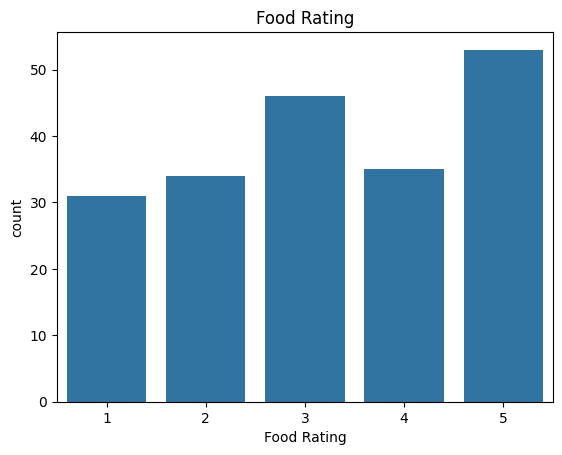

In [20]:
#univariate analysis
sns.countplot(x='Food Rating', data=df)
plt.title("Food Rating")
plt.show()

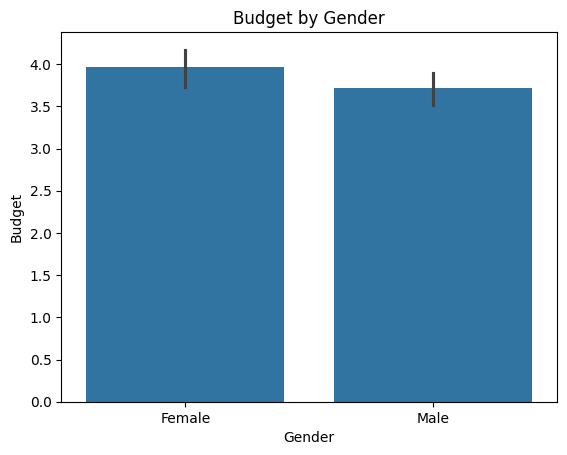

In [7]:
# bivariate analysis
sns.barplot(x='Gender', y='Budget', data=df)
plt.title("Budget by Gender")
plt.show()


In [10]:
#normalization and standarization
scaler=MinMaxScaler()
df[['Overall Rating','Budget']]=scaler.fit_transform(df[['Overall Rating','Budget']])


In [11]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,0.50,Japanese,Never,Never,5,4,0.875,No
1,2,123,"St. George,NY",Female,1991,Married,Student,0.50,Indian,Never,Socially,1,1,0.000,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,1.00,Seafood,Often,Often,5,5,1.000,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,1.00,Japanese,Never,Socially,3,1,0.250,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,0.75,Filipino,Socially,Never,2,4,0.500,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,0.75,French,Never,Socially,1,2,0.125,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,0.75,Chinese,Never,Often,1,2,0.125,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,1.00,Japanese,Never,Often,5,2,0.625,No
198,199,130,"St. George,NY",Male,2002,Married,Student,0.50,Filipino,Never,Socially,3,2,0.375,No


In [12]:
standarization=StandardScaler()
df[['Overall Rating','Budget']]=standarization.fit_transform(df[['Overall Rating','Budget']])

In [13]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,-0.773294,Japanese,Never,Never,5,4,1.184127,No
1,2,123,"St. George,NY",Female,1991,Married,Student,-0.773294,Indian,Never,Socially,1,1,-2.066417,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,1.124360,Seafood,Often,Often,5,5,1.648490,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,1.124360,Japanese,Never,Socially,3,1,-1.137690,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,0.175533,Filipino,Socially,Never,2,4,-0.208964,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,0.175533,French,Never,Socially,1,2,-1.602054,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,0.175533,Chinese,Never,Often,1,2,-1.602054,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,1.124360,Japanese,Never,Often,5,2,0.255400,No
198,199,130,"St. George,NY",Male,2002,Married,Student,-0.773294,Filipino,Never,Socially,3,2,-0.673327,No
